In [157]:
import numpy as np
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import pylab

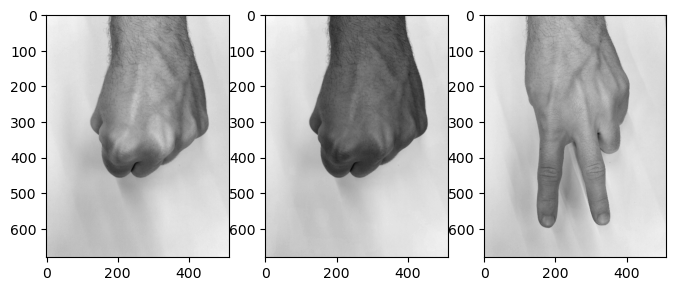

In [158]:
#Parametro para el tamaño de todas las imganes
pylab.rcParams["figure.figsize"] = (8,6)

#Cargamos todas las imagenes
#PIEDRA
piedra = cv.imread("piedra.jpg")
piedra = cv.resize(piedra, (512,680))
piedra_blue = piedra[:,:,0]

piedra_hsv = cv.cvtColor(piedra,cv.COLOR_BGR2HSV)
piedra_hsv_v = piedra_hsv[:,:,2]

#PAPEL
papel = cv.imread("papel.jpg")
papel = cv.resize(papel, (512,680))
papel_blue = papel[:,:,0]

papel_hsv = cv.cvtColor(papel,cv.COLOR_BGR2HSV)
papel_hsv_v = papel_hsv[:,:,2]

#TIGERA
tigera = cv.imread("tigera.jpg")
tigera = cv.resize(tigera, (512,680))
tigera_blue = tigera[:,:,0]

tigera_hsv = cv.cvtColor(tigera,cv.COLOR_BGR2HSV)
tigera_hsv_v = tigera_hsv[:,:,2]

fig, (ax1,ax2,ax3) = plt.subplots(1,3)

ax1.imshow(piedra_hsv_v,cmap="gray")
ax2.imshow(piedra_blue,cmap="gray")
ax3.imshow(tigera_hsv_v,cmap="gray")

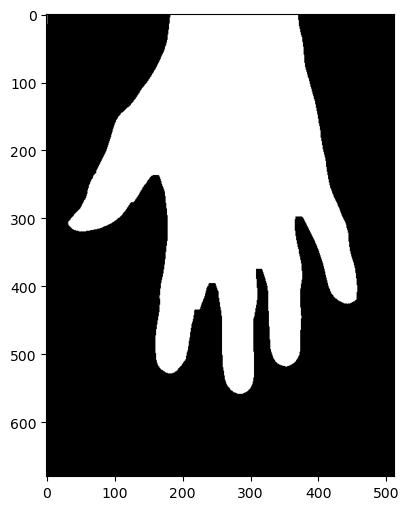

In [159]:
kernel = np.ones((5,5),np.uint8)
papel_hsv_v_dif = cv.GaussianBlur(src=papel_blue, ksize=(5,5), sigmaX=0, sigmaY=0)
ret1,papel_hsv_v_binary = cv.threshold(papel_hsv_v_dif,120,155,cv.THRESH_BINARY_INV)
kernel = np.ones((5,5),np.uint8)
papel_hsv_v_clean = cv.morphologyEx(papel_hsv_v_binary, cv.MORPH_CLOSE, kernel, iterations=1)

# kernel = np.ones((5,5),np.uint8)
papel_hsv_v_clean = cv.morphologyEx(papel_hsv_v_clean, cv.MORPH_OPEN, kernel, iterations=1)
papel_mascara = cv.erode(papel_hsv_v_clean,kernel,iterations=1)


# src_monedas_clean = cv.erode(src_monedas_clean,kernel,iterations=1)

plt.imshow(papel_mascara,cmap="gray")


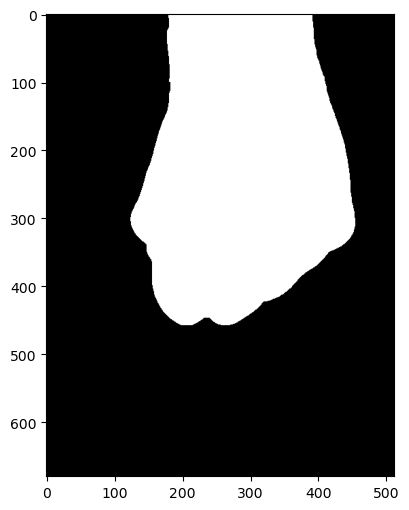

In [160]:
kernel = np.ones((5,5),np.uint8)
piedra_hsv_v_dif = cv.GaussianBlur(src=piedra_blue, ksize=(5,5), sigmaX=0, sigmaY=0)
ret1,piedra_hsv_v_binary = cv.threshold(piedra_hsv_v_dif,117,255,cv.THRESH_BINARY_INV)
kernel = np.ones((5,5),np.uint8)
piedra_hsv_v_clean = cv.morphologyEx(piedra_hsv_v_binary, cv.MORPH_CLOSE, kernel, iterations=2)

# kernel = np.ones((5,5),np.uint8)
piedra_mascara = cv.morphologyEx(piedra_hsv_v_clean, cv.MORPH_OPEN, kernel, iterations=1)

# src_monedas_clean = cv.erode(src_monedas_clean,kernel,iterations=1)

plt.imshow(piedra_mascara,cmap="gray")

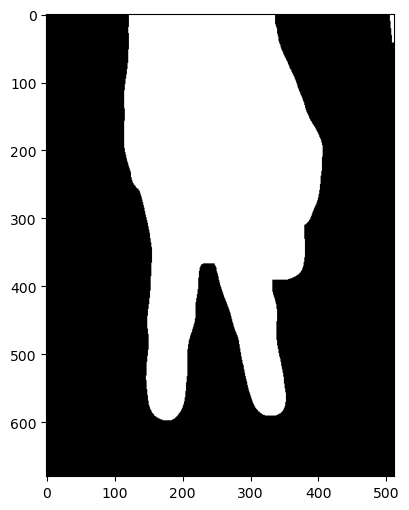

In [161]:
kernel = np.ones((5,5),np.uint8)
tigera_hsv_v_dif = cv.GaussianBlur(src=tigera_blue, ksize=(5,5), sigmaX=0, sigmaY=0)
ret1,tigera_hsv_v_binary = cv.threshold(tigera_hsv_v_dif,115,255,cv.THRESH_BINARY_INV)
kernel = np.ones((5,5),np.uint8)
tigera_hsv_v_clean = cv.morphologyEx(tigera_hsv_v_binary, cv.MORPH_CLOSE, kernel, iterations=4)

# kernel = np.ones((5,5),np.uint8)
tigera_mascara = cv.morphologyEx(tigera_hsv_v_clean, cv.MORPH_OPEN, kernel, iterations=1)

# src_monedas_clean = cv.erode(src_monedas_clean,kernel,iterations=1)

plt.imshow(tigera_mascara,cmap="gray")

### Sacamos los bordes

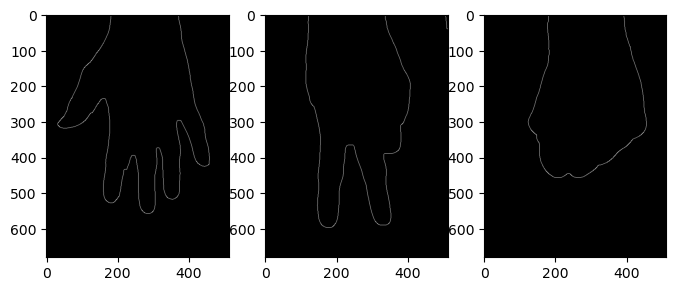

In [162]:
#Bordes del papel
umbral_minimo = 50
umbral_maximo = 100

cn_papel = cv.Canny(papel_mascara,umbral_minimo,umbral_maximo)

cn_tigera = cv.Canny(tigera_mascara,umbral_minimo,umbral_maximo)

cn_piedra = cv.Canny(piedra_mascara,umbral_minimo,umbral_maximo)

fig, (ax1,ax2,ax3) = plt.subplots(1,3)

ax1.imshow(cn_papel,cmap="gray")
ax2.imshow(cn_tigera,cmap="gray")
ax3.imshow(cn_piedra,cmap="gray")


1222
Centro: 302, 390
Área: 122.0  Perímetro: 2387.6063314676285
925
Centro: 170, 316
Área: 139.5  Perímetro: 4966.044052124023
Área: 0.0  Perímetro: 88.82842707633972
6
Área: 0.0  Perímetro: 89.31370830535889
Centro: 283, 437
Área: 40.5  Perímetro: 3753.7068345546722


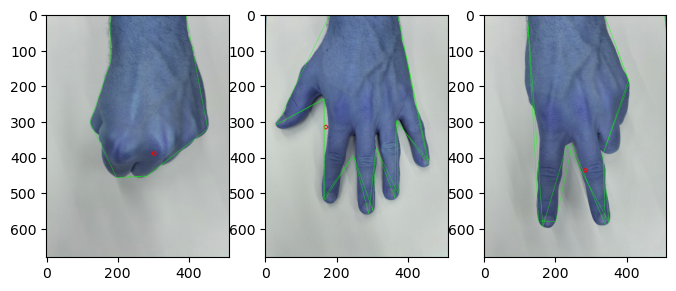

In [163]:
approx=[]
cn_list = [cn_piedra,cn_papel,cn_tigera]
img_org_list = [piedra,papel,tigera]
fig, (ax) = plt.subplots(1,3)
for i in range(3):
  contornos, jerarquia = cv.findContours(cn_list[i].copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
  print(len(contorno))
  #Recorremos todos los contornos
  #Obtener los datos de cada contorno
  for contorno in contornos:
    M = cv.moments(contorno)
    #Si es distinto de cero para saber si existe
    if M['m00'] != 0:
      cx = int(M["m10"]/M['m00'])
      cy = int(M["m01"]/M['m00'])
      print(f"Centro: {cx}, {cy}")
      #Pintamos un circulo dentro en el centro del contorno
      cv.circle(img_org_list[i], (cx, cy), 5, (255, 0, 0), 2)

    area = cv.contourArea(contorno)
    #Calcular el perimetro
    perimetro = cv.arcLength(contorno, True)
    print(f"Área: {area}  Perímetro: {perimetro}")
    #Obtenemos los datos para hacer un circulo rodeando el contorino. 
    #Como el contorno es otra circunferencia, nos va a quedar una circunferencia mas clara y marcada
    #(x,y),radius = cv.minEnclosingCircle(contorno)
    #cv.circle(img_org_list[i],(int(x),int(y)),int(radius), (0,0,255),2)
    #Colocar el texto
    #cv.putText(img_org_list[i],f'{area}',(cx+10, cy),cv.FONT_HERSHEY_COMPLEX,1,(255,0,0),2,cv.LINE_AA)  #Colcular el area 
    app = cv.approxPolyDP(contorno,0.01*perimetro,True)
    approx.append(app)

    cv.drawContours(img_org_list[i], [app], -1, (0,255,0), 1)
  ax[i].imshow(img_org_list[i])